In [8]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_results
from dependence.dependence_plot import plot_iterative_results


%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 12
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dim = 7
margins = [ot.Normal()]*dim
alpha = 0.05
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [10]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = int(dim * (dim-1)/2)

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print([i, j])
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[3, 1]
[5, 1]
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [11]:
n = 10000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)[0]

In [12]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": False,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)


Iteration 1: selected pair: (3, 1)
Total number of evaluations = 4200000. Minimum quantity at -5.16.



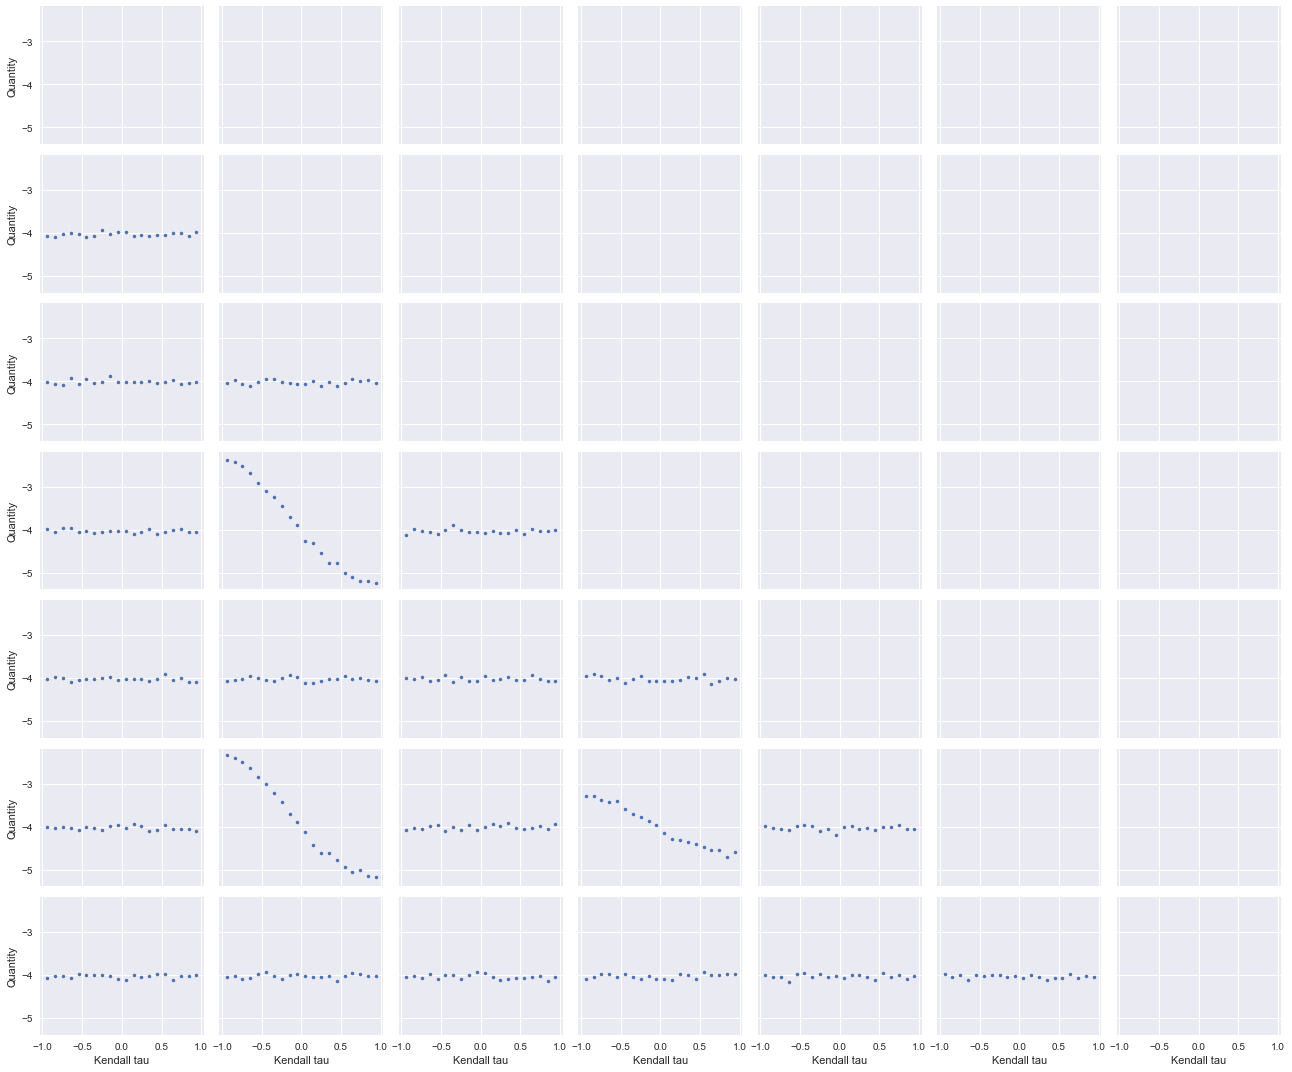

In [24]:
results = iterative_results[0]
matrix_plot_results(results, figsize=(18, 15))
#plt.savefig('output/matrix_plot.png')

In [ ]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": None,
    "max_n_pairs": 3,
    "grid_type": 'vertices',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False,
    "adapt_vine_structure":True
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

[[1 7 6 5 4 3 2]
 [0 2 7 6 5 4 3]
 [0 0 3 7 6 5 4]
 [0 0 0 4 7 6 5]
 [0 0 0 0 5 7 6]
 [0 0 0 0 0 6 7]
 [0 0 0 0 0 0 7]]


/users/home/benoumechia/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Erreur : 
 In function (Matrix, family = array(0, dim = dim(Matrix)), par = array(NA, dim = dim(Matrix)), par2 = array(NA, dim = dim(Matrix)), names = NULL, check.pars = TRUE) 
{
    args <- preproc(c(as.list(environment()), call = match.call()), check_matrix, check_fammat, check_parmat, check_par2mat)
    list2env(args, environment())
    if (length(names) > 0 & length(names) != dim(Matrix)[1]) 
        stop("Length of the vector 'names' is not correct.")
    sel <- lower.tri(family)
    if (check.pars & (any(family != 0) | any(!is.na(par)))) {
        BiCopCheck(family[sel], par[sel], par2[sel], call = match.call())
    }
    MaxMat <- createMaxMat(Matrix)
    CondDistr <- neededCondDistr(Matrix)
    RVM <- list(Matrix = Matrix, family = family, par = par, par2 = par2, names = names, MaxMat = MaxMat, CondDistr = CondDistr)
    class(RVM) <- "RVineMatrix"
    if (is.CVine(RV

RRuntimeError: Erreur : 
 In function (Matrix, family = array(0, dim = dim(Matrix)), par = array(NA, dim = dim(Matrix)), par2 = array(NA, dim = dim(Matrix)), names = NULL, check.pars = TRUE) 
{
    args <- preproc(c(as.list(environment()), call = match.call()), check_matrix, check_fammat, check_parmat, check_par2mat)
    list2env(args, environment())
    if (length(names) > 0 & length(names) != dim(Matrix)[1]) 
        stop("Length of the vector 'names' is not correct.")
    sel <- lower.tri(family)
    if (check.pars & (any(family != 0) | any(!is.na(par)))) {
        BiCopCheck(family[sel], par[sel], par2[sel], call = match.call())
    }
    MaxMat <- createMaxMat(Matrix)
    CondDistr <- neededCondDistr(Matrix)
    RVM <- list(Matrix = Matrix, family = family, par = par, par2 = par2, names = names, MaxMat = MaxMat, CondDistr = CondDistr)
    class(RVM) <- "RVineMatrix"
    if (is.CVine(RVM)) {
        RVM$type <- "C-vine"
    }
    else if (is.DVine(RVM)) {
        RVM$type <- "D-vine"
    }
    e


In [15]:
K = 2000
grid_type = 'lhs'
grid_results_lhs = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-6.61827837456309

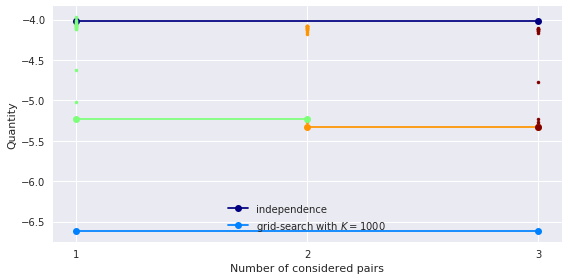

In [52]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_result=min_result, q_func=q_func)

In [43]:
K = 500
grid_type = 'vertices'
grid_results_vertices = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result_vertices = grid_results_vertices.min_result
min_result_vertices.quantity

-6.695369410706188